<a href="https://colab.research.google.com/github/syedawajihaali/Real-Time-Weather-Data-Analysis/blob/main/Real_Time_Weather_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Real-Time Pakistan Cities Weather Data Analysis:**

---



## **PART 1: DATA SCRAPING**
# **1. Importing libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime

# **2. Loading the list of cities from a csv file**

In [ ]:
cities = pd.read_csv('pakistan_cities.csv')
cities.head(10)

,City,Province,Country
0,Karachi,Sindh,Pakistan
1,Hyderabad,Sindh,Pakistan
2,Sukkur,Sindh,Pakistan
3,Larkana,Sindh,Pakistan
4,Mirpurkhas,Sindh,Pakistan
5,Nawabshah,Sindh,Pakistan
6,Jacobabad,Sindh,Pakistan
7,Dadu,Sindh,Pakistan
8,Thatta,Sindh,Pakistan
9,Badin,Sindh,Pakistan


# **3. Getting data through Open Weather API and storing it in a structured format.**

In [ ]:
api_key = '497a231d40288110e246eb559e5b7f6a'
weatherdata = []

for index, row in cities.iterrows():
    city = row['City']
    country = row['Country']
    province = row['Province']
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()

        if 'main' in data and 'wind' in data:
            temp = data['main']['temp']
            feels_like = data['main']['feels_like']
            temp_min = data['main']['temp_min']
            temp_max = data['main']['temp_max']
            humidity = data['main']['humidity']
            pressure = data['main']['pressure']
            wind_speed = data['wind']['speed']
            desc = data['weather'][0]['description']
            country = data['sys']['country']
            clouds = data['clouds']['all']
            lon = data['coord']['lon']
            lat = data['coord']['lat']
            sunrise_unix = data['sys']['sunrise']
            sunset_unix = data['sys']['sunset']

            sunrise = datetime.fromtimestamp(sunrise_unix).strftime('%I:%M %p')
            sunset = datetime.fromtimestamp(sunset_unix).strftime('%I:%M %p')

            weatherdata.append({
                'Country': country,
                'Province': province,
                'City': city,
                'Temperature': temp,
                'Feels_Like': feels_like,
                'Min_Temp': temp_min,
                'Max_Temp': temp_max,
                'Humidity': humidity,
                'Pressure': pressure,
                'Wind_Speed': wind_speed,
                'Cloudiness': clouds,
                'Description': desc.capitalize(),
                'Longitude': lon,
                'Latitude': lat,
                'Sunrise': sunrise,
                'Sunset': sunset
            })
    else:
        weatherdata.append({
            'City': city,
            'Error': f'Error fetching data: {response.status_code}'
        })

# **4. Saving the data in a CSV file**

In [ ]:
weather_df = pd.DataFrame(weatherdata)
weather_df.to_csv('pakistan_weather_data.csv', index=False)

## **PART 2: DATA EXPLORATION**
# **1. Reading the file and checking the stucture of data.**

In [ ]:
df = pd.read_csv('pakistan_weather_data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      121 non-null    object 
 1   Province     121 non-null    object 
 2   City         147 non-null    object 
 3   Temperature  121 non-null    float64
 4   Feels_Like   121 non-null    float64
 5   Min_Temp     121 non-null    float64
 6   Max_Temp     121 non-null    float64
 7   Humidity     121 non-null    float64
 8   Pressure     121 non-null    float64
 9   Wind_Speed   121 non-null    float64
 10  Cloudiness   121 non-null    float64
 11  Description  121 non-null    object 
 12  Longitude    121 non-null    float64
 13  Latitude     121 non-null    float64
 14  Sunrise      121 non-null    object 
 15  Sunset       121 non-null    object 
 16  Error        26 non-null     object 
dtypes: float64(10), object(7)
memory usage: 19.6+ KB
None


# **2. Checking statistical summaries and weather descriptions**

In [ ]:
df.describe()

,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Longitude,Latitude
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,297.658926,297.956033,297.649504,297.674876,61.289256,1003.537190,2.784545,13.314050,68.753469,29.888118
std,4.192564,4.834505,4.228133,4.181492,17.210190,4.018792,2.179279,26.249772,12.616513,5.117664
min,275.910000,274.120000,275.910000,275.910000,16.000000,999.000000,0.000000,0.000000,-9.569000,8.518500
25%,295.880000,295.680000,295.880000,295.880000,49.000000,1001.000000,1.300000,0.000000,68.223100,27.529500
50%,299.100000,299.320000,299.100000,299.160000,64.000000,1002.000000,2.190000,0.000000,70.634800,30.300000
75%,300.150000,301.330000,300.150000,300.150000,73.000000,1005.000000,3.330000,12.000000,72.934100,32.161700
max,304.550000,308.600000,304.550000,304.550000,100.000000,1025.000000,9.400000,100.000000,117.789200,51.445000


In [ ]:
df['Description'].value_counts()

,count
Description,
Clear sky,86
Scattered clouds,9
Few clouds,9
Overcast clouds,6
Broken clouds,5
Smoke,4
Light rain,1
Haze,1


## **PART 3: DATA CLEANING**
# **1. Removing unnecessary columns/rows and handling missing values**

In [ ]:
print(df.isnull().sum())
#df.drop_duplicates(inplace=True)
#df.dropna(inplace=True)

Country         26
Province        26
City             0
Temperature     26
Feels_Like      26
Min_Temp        26
Max_Temp        26
Humidity        26
Pressure        26
Wind_Speed      26
Cloudiness      26
Description     26
Longitude       26
Latitude        26
Sunrise         26
Sunset          26
Error          121
dtype: int64


# **2. Normalising columns and converting data into human readable form**

In [ ]:
df.columns = df.columns.str.lower()
df['sunrise'] = pd.to_datetime(df['sunrise'], errors='coerce')
df['sunset'] = pd.to_datetime(df['sunset'], errors='coerce')
df.head()

<ipython-input-46-4de008f75820>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sunrise'] = pd.to_datetime(df['sunrise'], errors='coerce')
<ipython-input-46-4de008f75820>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sunset'] = pd.to_datetime(df['sunset'], errors='coerce')


,country,province,city,temperature,feels_like,min_temp,max_temp,humidity,pressure,wind_speed,cloudiness,description,longitude,latitude,sunrise,sunset,error
0,PK,Sindh,Karachi,300.05,302.50,300.05,300.05,78.0,1003.0,4.12,75.0,Smoke,67.0822,24.9056,2024-09-15 01:17:00,2024-09-15 13:36:00,NaN
1,IN,Sindh,Hyderabad,295.88,296.51,295.88,295.88,88.0,1008.0,5.14,40.0,Scattered clouds,78.4744,17.3753,2024-09-15 00:34:00,2024-09-15 12:48:00,NaN
2,PK,Sindh,Sukkur,300.79,302.69,300.79,300.79,66.0,1000.0,4.55,0.0,Clear sky,68.8574,27.7052,2024-09-15 01:09:00,2024-09-15 13:29:00,NaN
3,PK,Sindh,Larkana,299.91,301.40,299.91,299.91,67.0,1000.0,3.17,0.0,Clear sky,68.2141,27.5551,2024-09-15 01:12:00,2024-09-15 13:32:00,NaN
4,NaN,NaN,Mirpurkhas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,Error fetching data: 404


## **PART 4+5: EDA + DATA VISUALIZATION**
### **1. Distribution of Temperature over the dataset**




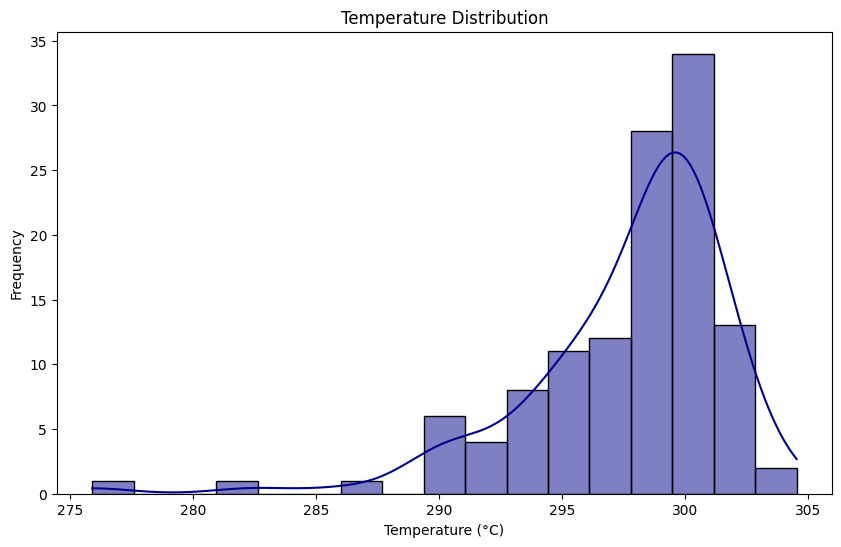

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature'], kde=True, color='darkblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

 ***Few Insights From Histogram:***
*   The data shows a range of temperatures from approximately 275°C to 305°C.
*   The peak around 300°C indicates that this temperature is the most common.
*   The right-skewed distribution suggests that while most temperatures are around 300°C, there are some higher temperatures that occur less frequently.

### **2. Grouped Bar plot to compare the weather attributes of top 20 cities by temperature**

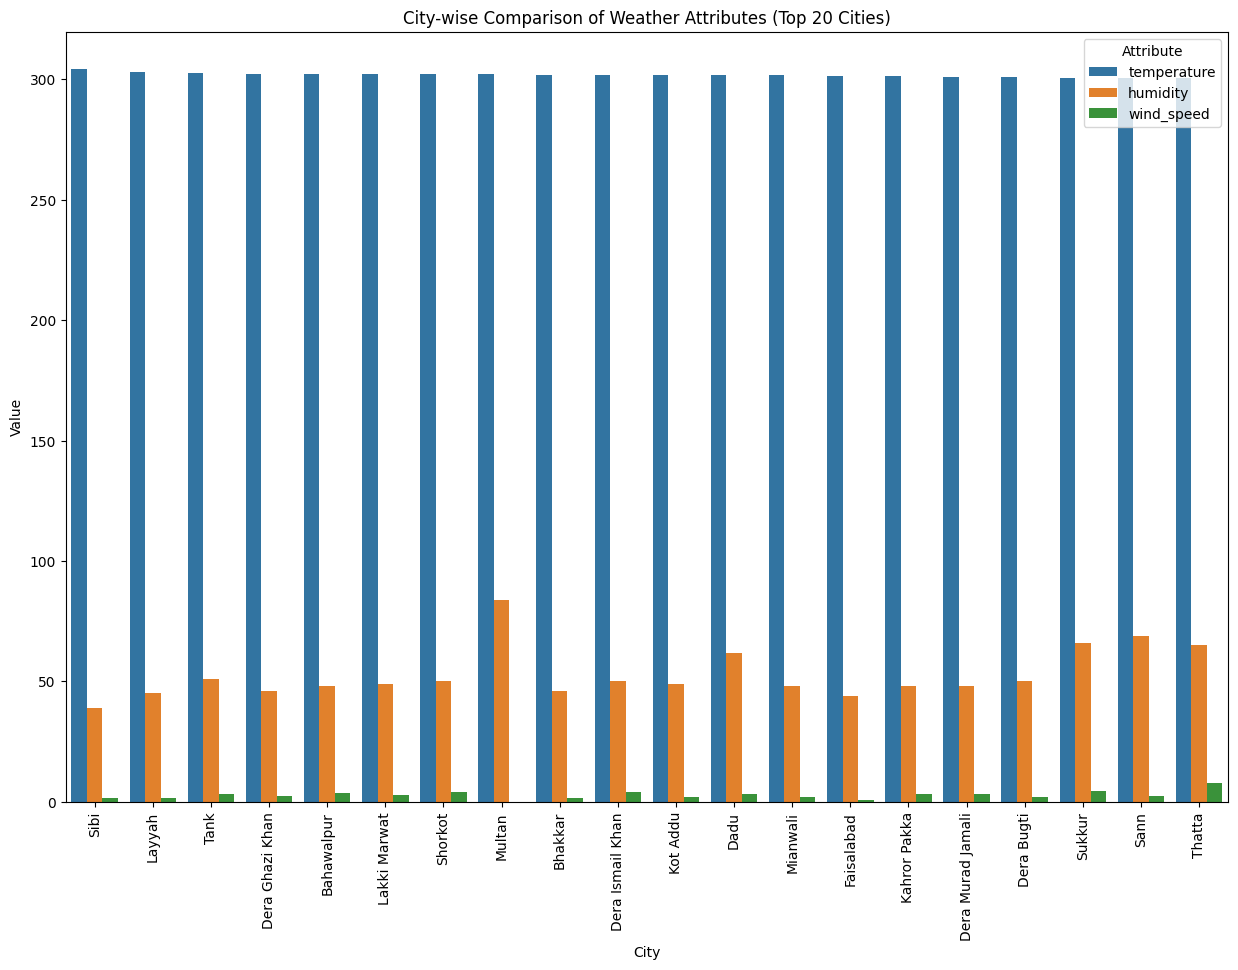

In [ ]:
top_cities_temp = df.sort_values(by='temperature', ascending=False).head(20)
#print(top_cities_temp)
melted_df = top_cities_temp.melt(id_vars='city', value_vars=['temperature', 'humidity', 'wind_speed'],
                                 var_name='Attribute', value_name='Value')
melted_df['Value'] = pd.to_numeric(melted_df['Value'], errors='coerce')
melted_df.dropna(subset=['Value'], inplace=True)

plt.figure(figsize=(15, 10))
sns.barplot(x='city', y='Value', hue='Attribute', data=melted_df)
plt.title('City-wise Comparison of Weather Attributes (Top 20 Cities)')
plt.xlabel('City')
plt.ylabel('Value')
plt.legend(title='Attribute')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


***Few Insights from the Bar Plot:***
*   These top 20 cities which have higher temperature have kind of higher humidity as well.
*   We can see that the wind speed have doesn't have an impactful relationship with temperature as it can be seen that cities which such higher temperatures have relatively low wind speeds.

###  **3. Correlation Matrix**


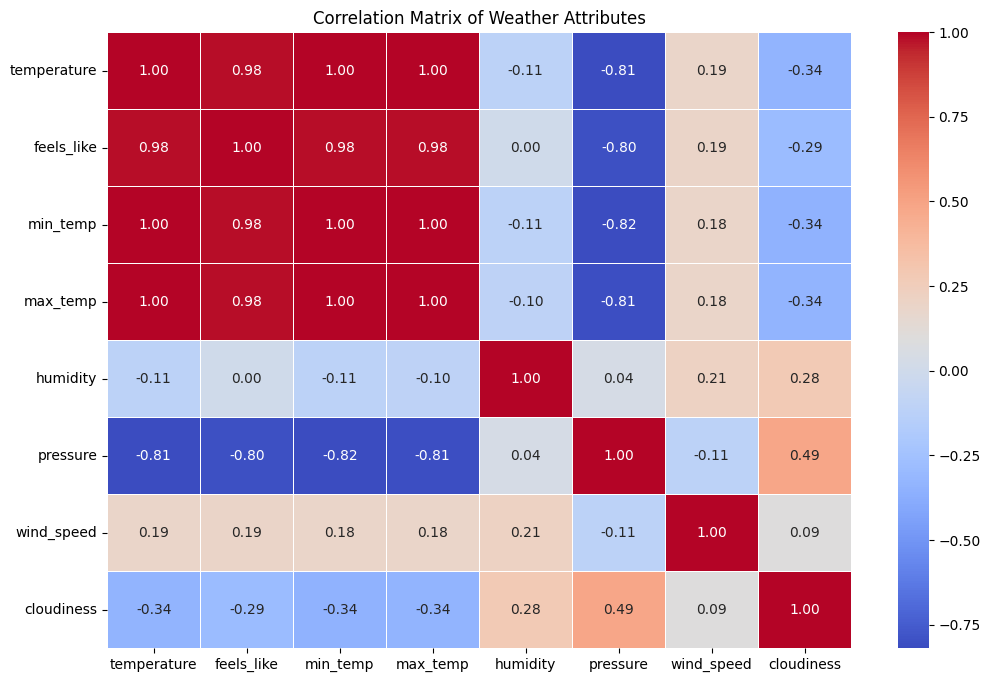

In [ ]:
corr_matrix = df[['temperature', 'feels_like', 'min_temp', 'max_temp', 'humidity', 'pressure', 'wind_speed', 'cloudiness']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Weather Attributes')
plt.show()


***Few Insights from Correlation Matrix:***

* As expected, **temperature** and **feels like** have a very strong positive correlation (0.98). This indicates that the perceived temperature is highly influenced by the actual temperature.
* As **pressure** increases, **temperature** tends to decrease, and vice versa. This relationship is characterized by a correlation of -0.81."
* There is a weak positive correlation between **cloudiness** and **wind speed**. This means that there's a slight tendency for slightly higher wind speeds on cloudy days, but the relationship is not very strong.
* A correlation coefficient of 0.49 between **pressure** and **cloudiness** indicates a moderate positive relationship.So, there's a chance that when the atmospheric pressure rises, it's more likely to be cloudy.

### **4. Proportion of different weather conditions**

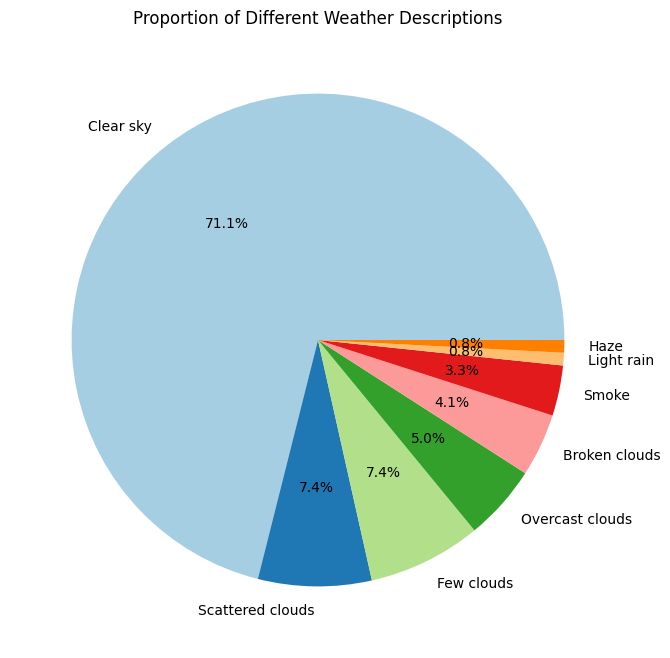

In [ ]:
weather_description_counts = df['description'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(weather_description_counts, labels=weather_description_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(weather_description_counts))))
plt.title('Proportion of Different Weather Descriptions')
plt.show()

***Few Insights From The Pie Chart:***
* The most prevalent weather condition is **Clear sky**, accounting for 71.1% of the total observations. This suggests that the majority of days are characterized by clear skies in the region represented by the data.
* Apart from the **clear sky**, cloud-related weather descriptions make up a major share of the remaining observations. **Scattered clouds** and **Few clouds** both account for 7.4%, while **Broken clouds** and **Overcast clouds** account for 5.0% and 3.3%, respectively. It also indicates that cloudiness is quite common but not as prevalent as clear sky.
* **Haze**, **light rain**, and **smoke** are less frequent, with percentages ranging from 0.8% to 4.1%. This suggests that these weather conditions are less common compared to clear skies and cloud cover.

### **5. Sunrise and Sunset times accross the cities**

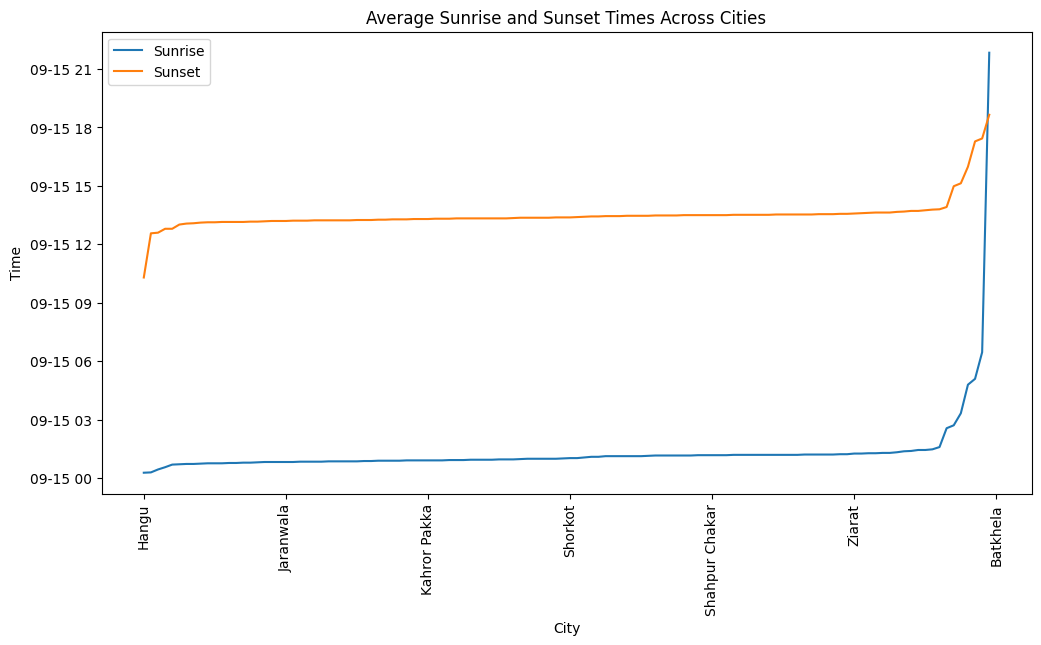

In [ ]:
plt.figure(figsize=(12, 6))
df.groupby('city')['sunrise'].mean().sort_values().plot(kind='line', label='Sunrise')
df.groupby('city')['sunset'].mean().sort_values().plot(kind='line', label='Sunset')
plt.title('Average Sunrise and Sunset Times Across Cities')
plt.xlabel('City')
plt.ylabel('Time')
plt.xticks(rotation=90)
plt.legend()
plt.show()

***Few Insights From The Line Plot:***

***by observing the location of these cities on the geographical map of pakistan***
* The earlier **sunrise** times are concentrated in the southern cities (Hangu, Jaranwala, Kahror Pakka), while the later sunrise times are more common in the northern cities (Batkhela, Ziarat).
* The earlier **sunset** times are observed in the northern cities (Batkhela, Ziarat), and the later sunset times are found in the southern cities (Hangu, Jaranwala, Kahror Pakka).

# **Conclusion**
In this project, I conducted a thorough analysis of weather data for various cities across Pakistan, leveraging data scraping, exploratory data analysis (EDA), and visualization techniques using Python and its libraries like pandas, matplotlib and seaborn.

1. **Data Scraping:** Extracted weather data from the OpenWeather API, formatted it into a DataFrame, and saved it for further analysis.

2. **Data Exploration:** Asessed the dataset’s structure and statistical summaries to understand overall trends and data characteristics.

3. **Data Cleaning:** Handled missing values, standardized column names, and ensured data consistency to prepare for accurate analysis.

4. **EDA and Visualization:**
   - **Temperature Distribution:** Most temperatures were centered around 300°C, with a right-skewed distribution indicating less frequent higher temperatures.
   - **Top 20 Cities Comparison:** Cities with higher temperatures showed higher humidity and lower wind speeds.
   - **Correlation Matrix:** A strong correlation between actual and perceived temperature; a negative correlation between pressure and temperature; a weak link between cloudiness and wind speed.
   - **Weather Conditions:** Clear skies were the most common (71.1%), followed by various cloud conditions. Haze, light rain, and smoke were less frequent.
   - **Sunrise and Sunset Times:** Earlier sunrises were observed in southern cities, while northern cities experienced later sunrises, with similar patterns for sunsets.

This project provided a comprehensive analysis of weather patterns across Pakistan, offering new insights through personalized visualizations and interpretations.